
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [2]:

import numpy as np
import matplotlib.pyplot as plt


In [6]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        self.mean=np.mean(X,axis=0)
        self.std=np.std(X,axis=0)
        return self
    
    def transform(self, X):
        return (X-self.mean)/self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [8]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        #assignig the values
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            # Computing the loss
            mse = np.mean((y_pred - y) ** 2)
            l2_penalty = self.l2_lambda * np.sum(self.w ** 2)
            loss = mse + l2_penalty
            self.losses.append(loss)
            # Gradient or the small change in the wieght and the bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(y_pred - y)
            # Update parameters with help of the gradients
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [ ]:
# Dataset
X = np.array([[2], [4], [6], [8], [10]])# 2 ka table
y = np.array([3, 6, 9, 12, 115])# 3 ka table

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Training of the  model
model = LinearRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)


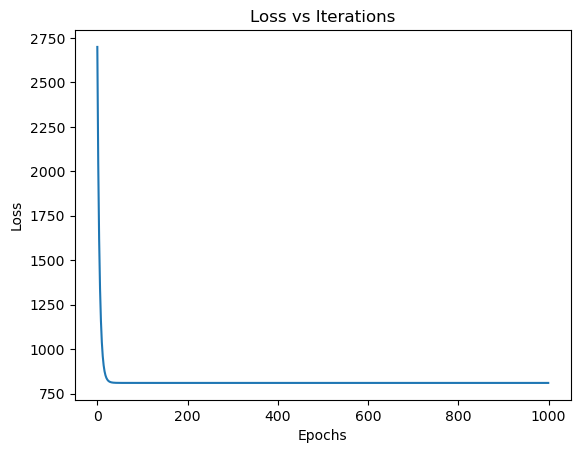

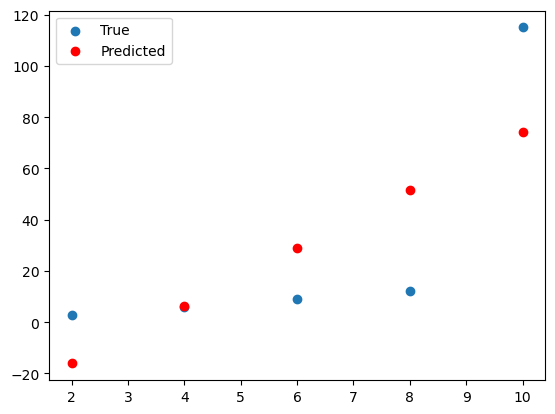

In [10]:
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

plt.scatter(X, y, label="True")
plt.scatter(X, y_pred, label="Predicted", color="red")
plt.legend()
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [11]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [12]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []
        for _ in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = sigmoid(z)
            loss = -np.mean(
                y * np.log(y_pred + 1e-9) +
                (1 - y) * np.log(1 - y_pred + 1e-9)
            ) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) \
                 + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


In [ ]:
#Dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1])
#standardization of the X
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
#Traning the model
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
model.fit(X_scaled, y)
#Prediction
y_pred = model.predict(X_scaled)


In [15]:
accuracy = np.mean(y_pred == y)
print("Accuracy Achieved:", accuracy)


Accuracy Achieved: 1.0


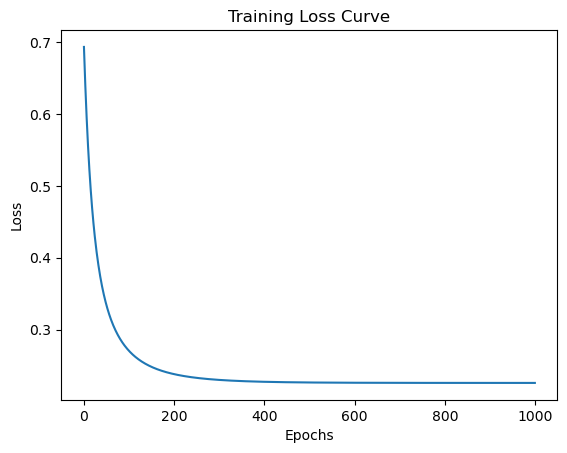

In [16]:
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [17]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n, m = M.shape
    # Initialize centroids randomly from matrix values
    flat_values = M.flatten()
    centroids = np.random.choice(flat_values, k, replace=False)
    table = np.zeros((n, m), dtype=int)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        for i in range(n):
            for j in range(m):
                distances = np.abs(M[i, j] - centroids)
                table[i, j] = np.argmin(distances)
        for cluster_id in range(k):
            cluster_values = []
            for i in range(n):
                for j in range(m):
                    if table[i, j] == cluster_id:
                        cluster_values.append(M[i, j])
            if len(cluster_values) > 0:
                centroids[cluster_id] = np.mean(cluster_values)
        # Checking whether it is Convergening or not 
        if np.allclose(old_centroids, centroids):
            break
    cookbook = {cid: [] for cid in range(k)}
    for i in range(n):
        for j in range(m):
            cid = table[i, j]
            cookbook[cid].append((i, j))
    return table, cookbook, centroids


In [18]:
np.random.seed(0)
M = np.random.randint(0, 10, (4, 4))
table, cookbook, centroids = kmeans_matrix(M, k=3)
print("Matrix M:\n", M)
print("\nAssignment Table:\n",table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for k, v in cookbook.items():
    print(k, ":", v)


Matrix M:
 [[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]
 [8 8 1 6]]

Assignment Table:
 [[2 0 0 0]
 [1 1 0 2]
 [0 2 1 1]
 [1 1 0 1]]

Centroids:
 [2 7 4]

Cookbook:
0 : [(0, 1), (0, 2), (0, 3), (1, 2), (2, 0), (3, 2)]
1 : [(1, 0), (1, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 3)]
2 : [(0, 0), (1, 3), (2, 1)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
